# Prediction of the target in the Test.csv

## Preprocessing of the Test.csv

In [1]:
import pandas as pd
import numpy as np
import importlib
import preprocessing_copy
importlib.reload(preprocessing_copy)
from preprocessing_copy import preprocess_for_air_quality

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

RSEED = 42

In [36]:
#df_test = pd.read_csv('data/Test.csv')

In [59]:
import pickle

model_path = "models/model_randomforest.pkl"   # relativer Pfad
with open(model_path, "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Modell erfolgreich geladen!")

✅ Modell erfolgreich geladen!


In [2]:
df = pd.read_csv('data/Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [4]:
df.isna().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [5]:
df_train, df_test = train_test_split(df, random_state=RSEED, train_size=0.2)

In [6]:
df_train_proc = preprocess_for_air_quality(df_train, df_train)

In [7]:
df_test_proc = preprocess_for_air_quality(df_test, df_train)

In [8]:
df_train_proc.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,-0.445819,-1.849847,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,010Q650 X 2020-01-13,2020-01-13,010Q650,25.0,17.0,41.0,286.02,90,-0.131284,-2.053901,...,45.461741,-54.350118,21.431726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,010Q650 X 2020-01-15,2020-01-15,010Q650,23.0,11.0,43.0,682.80,96,0.271230,-1.677186,...,44.042485,-73.531338,33.016922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,010Q650 X 2020-01-18,2020-01-18,010Q650,60.0,39.0,96.0,2762.28,81,-0.101832,-1.855079,...,38.523792,-54.567406,22.841369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,010Q650 X 2020-03-24,2020-03-24,010Q650,21.0,9.0,43.0,747.89,94,0.045429,0.358120,...,57.759226,-39.590673,48.292916,1780.158325,3174.871094,0.010486,75.224136,50.838276,-27.532251,42.175129


In [9]:
df_test_proc.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,-0.445819,-1.849847,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,010Q650 X 2020-01-13,2020-01-13,010Q650,25.0,17.0,41.0,286.02,90,-0.131284,-2.053901,...,45.461741,-54.350118,21.431726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,010Q650 X 2020-01-15,2020-01-15,010Q650,23.0,11.0,43.0,682.80,96,0.271230,-1.677186,...,44.042485,-73.531338,33.016922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,010Q650 X 2020-01-18,2020-01-18,010Q650,60.0,39.0,96.0,2762.28,81,-0.101832,-1.855079,...,38.523792,-54.567406,22.841369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,010Q650 X 2020-03-24,2020-03-24,010Q650,21.0,9.0,43.0,747.89,94,0.045429,0.358120,...,57.759226,-39.590673,48.292916,1780.158325,3174.871094,0.010486,75.224136,50.838276,-27.532251,42.175129


In [10]:
df_test_proc.isna().sum()

Place_ID X Date                 0
Date                            0
Place_ID                        0
target                          0
target_min                      0
                               ..
L3_CH4_aerosol_optical_depth    0
L3_CH4_sensor_azimuth_angle     0
L3_CH4_sensor_zenith_angle      0
L3_CH4_solar_azimuth_angle      0
L3_CH4_solar_zenith_angle       0
Length: 82, dtype: int64

In [11]:
df_test_proc.isna().sum()

Place_ID X Date                 0
Date                            0
Place_ID                        0
target                          0
target_min                      0
                               ..
L3_CH4_aerosol_optical_depth    0
L3_CH4_sensor_azimuth_angle     0
L3_CH4_sensor_zenith_angle      0
L3_CH4_solar_azimuth_angle      0
L3_CH4_solar_zenith_angle       0
Length: 82, dtype: int64

In [12]:
df_test_proc.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,-0.445819,-1.849847,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,010Q650 X 2020-01-13,2020-01-13,010Q650,25.0,17.0,41.0,286.02,90,-0.131284,-2.053901,...,45.461741,-54.350118,21.431726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,010Q650 X 2020-01-15,2020-01-15,010Q650,23.0,11.0,43.0,682.80,96,0.271230,-1.677186,...,44.042485,-73.531338,33.016922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,010Q650 X 2020-01-18,2020-01-18,010Q650,60.0,39.0,96.0,2762.28,81,-0.101832,-1.855079,...,38.523792,-54.567406,22.841369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,010Q650 X 2020-03-24,2020-03-24,010Q650,21.0,9.0,43.0,747.89,94,0.045429,0.358120,...,57.759226,-39.590673,48.292916,1780.158325,3174.871094,0.010486,75.224136,50.838276,-27.532251,42.175129


In [13]:
X_train = df_train_proc.drop(columns=['Place_ID X Date', 'Date', 'Place_ID', 'target','target_min', 'target_max', 'target_variance', 'target_count'])
y_train = df_train_proc['target'] 

In [14]:
X_test = df_test_proc.drop(columns=['Place_ID X Date', 'Date', 'Place_ID', 'target','target_min', 'target_max', 'target_variance', 'target_count'])
y_test = df_test_proc['target'] 

In [15]:
def print_pretty_summary(name, y_actual, y_pred):
    print(name)
    print('=======================')
    
    r2 = r2_score(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
    
    print(f"R²:   {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print()

beste parameter for RandomForestReg:  
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': True}

In [16]:
rf = RandomForestRegressor(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 16, bootstrap= True, random_state=RSEED)
rf.fit(X_train, y_train)



RandomForestRegressor(max_depth=16, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=400, random_state=42)

In [17]:
y_pred_test = rf.predict(X_test)

In [61]:
#y_pred_loaded = loaded_model.predict(X_test)
#print_pretty_summary('loaded model', y_test, y_pred_loaded)

In [18]:
print_pretty_summary('RF', y_test, y_pred_test)

RF
R²:   0.886
RMSE: 17.118



In [ ]:
#y_pred_final = rf.predict(X_final)

In [ ]:
#rf_best_rs.fit(X_train, y_train)
#fi = (pd.DataFrame({
#        "feature": X_train.columns,
#        "importance": rf_best_rs.featureimportances
#     })
#     .sort_values("importance", ascending=False))
#print(fi.head(20))

In [19]:
df_y_pred_test = pd.DataFrame(y_pred_test)

df_y_pred_test.head()
#df_y_pred_test.info()

,0
0,30.572348
1,36.126476
2,33.293217
3,61.691665
4,29.299356


In [20]:
y_pred_series = df_y_pred_test.iloc[:, 0].reset_index(drop=True)
y_pred_series.name = 'y_pred'
df_pred_concat = pd.concat(
    [
        df_test_proc.Date.reset_index(drop=True),
        df_test_proc.Place_ID.reset_index(drop=True),
        y_pred_series
    ],
    axis=1
)

df_pred_concat.columns = ['Date', 'Place_ID', 'y_pred']

In [48]:
df_pred_concat.tail(50)
#df_pred_concat.info()

,Date,Place_ID,y_pred
1516,2020-01-06,XY3IU5C,172.533085
1517,2020-01-07,XY3IU5C,139.783339
1518,2020-01-12,XY3IU5C,188.600580
1519,2020-02-27,YAAFH6B,59.187794
1520,2020-03-01,YAAFH6B,63.190029
1521,2020-03-02,YAAFH6B,59.493077
1522,2020-03-10,YAAFH6B,48.715562
1523,2020-03-12,YAAFH6B,49.238281
1524,2020-03-13,YAAFH6B,41.397780
1525,2020-03-17,YAAFH6B,45.609861


In [27]:
df_pred_concat.groupby(by='Place_ID').value_counts()

Place_ID  Date        y_pred    
010Q650   2020-01-11  30.572348     1
          2020-01-13  36.126476     1
          2020-03-31  49.627460     1
          2020-03-28  48.581331     1
          2020-03-24  29.299356     1
                                   ..
YSIXKFZ   2020-03-24  72.251834     1
YWSFY6Q   2020-03-16  56.546519     1
          2020-01-19  79.202972     1
          2020-01-15  101.310453    1
          2020-03-18  75.402494     1
Name: count, Length: 1566, dtype: int64

In [49]:
df_pred_concat.Date.nunique()

94

In [51]:
print(df_test_proc.Date.nunique())
print(df_test.Date.nunique())

94
94


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_actual_vs_pred_over_time(
    model, X, y, meta_df,
    date_col="Date", place_col="Place_ID",
    place_id=None, rolling=None, title_prefix="PM2.5"
):
    """
    Plot Actual vs. Predicted PM2.5 über die Zeit.
    
model: trainiertes Modell oder Pipeline mit .predict()
X, y: Trainings-Features/-Ziel (y als Series, index wie X)
meta_df: DataFrame mit Date & Place_ID für dieselben Zeilen (Index == X.index)
place_id: optional, nur diesen Ort plotten (z.B. '010G650')
rolling: optionales Fenster (z.B. 3) für gleitenden Mittelwert
"""

    # Vorhersagen
    y_pred = model.predict(X)

    # Zusammenführen und sortieren
    dfp = pd.DataFrame({
        "Date": meta_df.Date,
        "Place_ID": meta_df[place_col],
        "Actual": y.values if isinstance(y, pd.Series) else y,
        "Pred": y_pred
    }, index=meta_df.index)

    if place_id is not None:
        dfp = dfp[dfp["Place_ID"] == place_id]

    dfp = dfp.sort_values("Date")

    # optional glätten
    if rolling is not None and rolling > 1:
        dfp["Actual_plot"] = dfp["Actual"].rolling(rolling, min_periods=1).mean()
        dfp["Pred_plot"]   = dfp["Pred"].rolling(rolling, min_periods=1).mean()
    else:
        dfp["Actual_plot"], dfp["Pred_plot"] = dfp["Actual"], dfp["Pred"]

    # Plot
    plt.figure(figsize=(12,4))
    plt.scatter(dfp["Date"], dfp["Actual_plot"], label="Actual PM2.5")
    plt.plot(dfp["Date"], dfp["Pred_plot"],   label="Predicted PM2.5")
    ttl = f"{title_prefix} Trend"
    if place_id is not None:
        ttl += f" — {place_id}"
    plt.title(ttl)
    plt.xlabel("Date")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

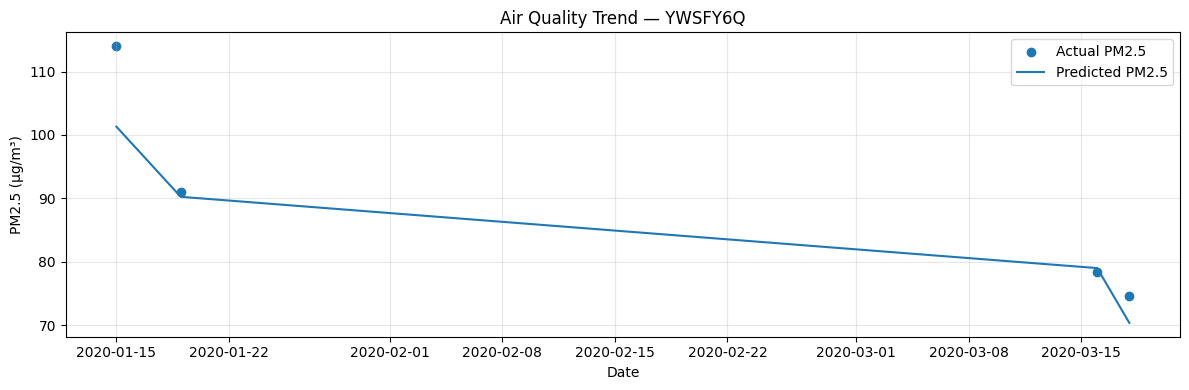

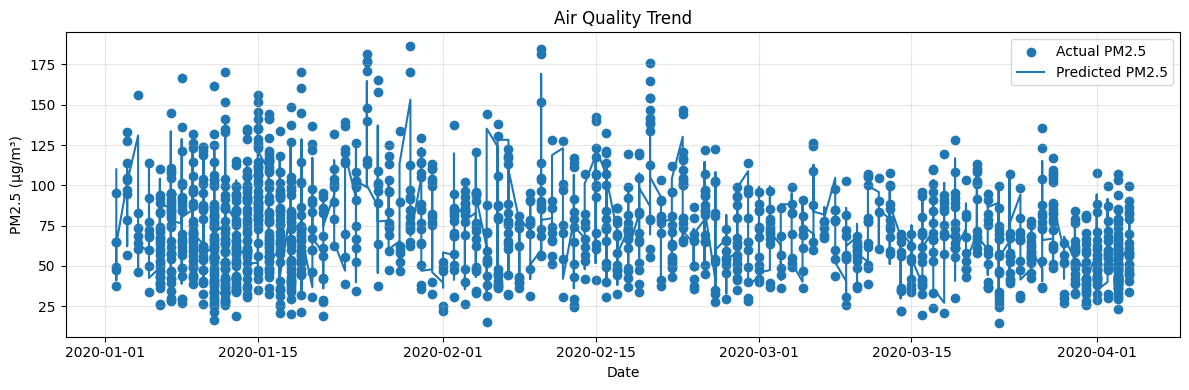

In [22]:
# meta_df muss zu X/y passen und die Originalspalten Date & Place_ID enthalten
#meta_train = df.loc[df_pred_concat.index, ["Date", "Place_ID"]]

# 1) Plot für einen Ort (wie im Beispielbild)
plot_actual_vs_pred_over_time(rf, X_test, y_test, df_pred_concat,
                              place_id="YWSFY6Q", rolling=3, title_prefix="Air Quality")

# 2) Gesamter Trainingssatz (alle Orte zusammen)
plot_actual_vs_pred_over_time(rf, X_test, y_test, df_pred_concat,
                              place_id=None, rolling=3, title_prefix="Air Quality")